# Home Cage - Individual PSTH Analysis

- From all mice, look at different onsets of investigations and the associated response

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from experiment_class import Experiment
from bouts_extension import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# NAc
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac_csvs"
brain_region = '#FFAF00'

# NAc: #15616F
# mPFC: #FFAF00

# mPFC
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\mpfc_csvs"
# brain_region = '#FFAF00'

In [3]:
experiment = Experiment(experiment_path, csv_base_path)

experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n1-240508-080051\Notes.txt
read from t=0s to t=1783.78s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n2-240508-092906\Notes.txt
read from t=0s to t=1810.33s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n3-240509-062454\Notes.txt
read from t=0s to t=1803.43s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n4-240509-075317\Notes.txt
read from t=0s to t=1802.32s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n5-240823-085032\Notes.txt
read from t=0s to t=1789.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n6-240823-101436\Notes.txt
read from

In [4]:
bout_definitions = [
    {'prefix': 'Short_Term', 'introduced': 'Short_Term_Introduced', 'removed': 'Short_Term_Removed'},
    {'prefix': 'Long_Term', 'introduced': 'Long_Term_Introduced', 'removed': 'Long_Term_Removed'},
    {'prefix': 'Novel', 'introduced': 'Novel_Introduced', 'removed': 'Novel_Removed'}
]

experiment.group_extract_manual_annotations(bout_definitions,first_only=False)

Processing behaviors for n1-240508-080051...
Processing behaviors for n2-240508-092906...
Processing behaviors for n3-240509-062454...
Processing behaviors for n4-240509-075317...
Processing behaviors for n5-240823-085032...
Processing behaviors for n6-240823-101436...
Processing behaviors for n7-240824-062103...
Processing behaviors for nn1-250120-063024...
Processing behaviors for nn2-250120-072910...
Processing behaviors for nn3-250121-074834...
Processing behaviors for nn4-250121-084228...
Processing behaviors for nn5-250120-081227...
Processing behaviors for nn6-250120-085156...
Processing behaviors for nn7-250121-094048...
Processing behaviors for nn8-250121-101912...


In [5]:
exp_dict = get_trial_dataframes(experiment)

In [6]:
desired_bouts = ['Short_Term-1', 'Novel-1', 'Short_Term-2', 'Long_Term-1']
metadata_df = create_metadata_dataframe(exp_dict, behavior="Investigation", desired_bouts=desired_bouts)

In [7]:
metadata_df.head()

,Subject,Bout,Behavior,Total Investigation Time,Average Bout Duration
0,n1,Short_Term-1,Investigation,85.127,2.837567
1,n1,Novel-1,Investigation,31.000,3.100000
2,n1,Short_Term-2,Investigation,15.801,1.215462
3,n1,Long_Term-1,Investigation,28.668,1.592667
4,n2,Short_Term-1,Investigation,76.734,2.557800


In [8]:
total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=total_avg_bout_duration, 
                                  mode='standard')

Total Average Bout Duration: 2.5689
Computing DA metrics for n1-240508-080051 ...
Computing DA metrics for n2-240508-092906 ...
Computing DA metrics for n3-240509-062454 ...
Computing DA metrics for n4-240509-075317 ...
Computing DA metrics for n5-240823-085032 ...
Computing DA metrics for n6-240823-101436 ...
Computing DA metrics for n7-240824-062103 ...
Computing DA metrics for nn1-250120-063024 ...
Computing DA metrics for nn2-250120-072910 ...
Computing DA metrics for nn3-250121-074834 ...
Computing DA metrics for nn4-250121-084228 ...
Computing DA metrics for nn5-250120-081227 ...
Computing DA metrics for nn6-250120-085156 ...
Computing DA metrics for nn7-250121-094048 ...
Computing DA metrics for nn8-250121-101912 ...


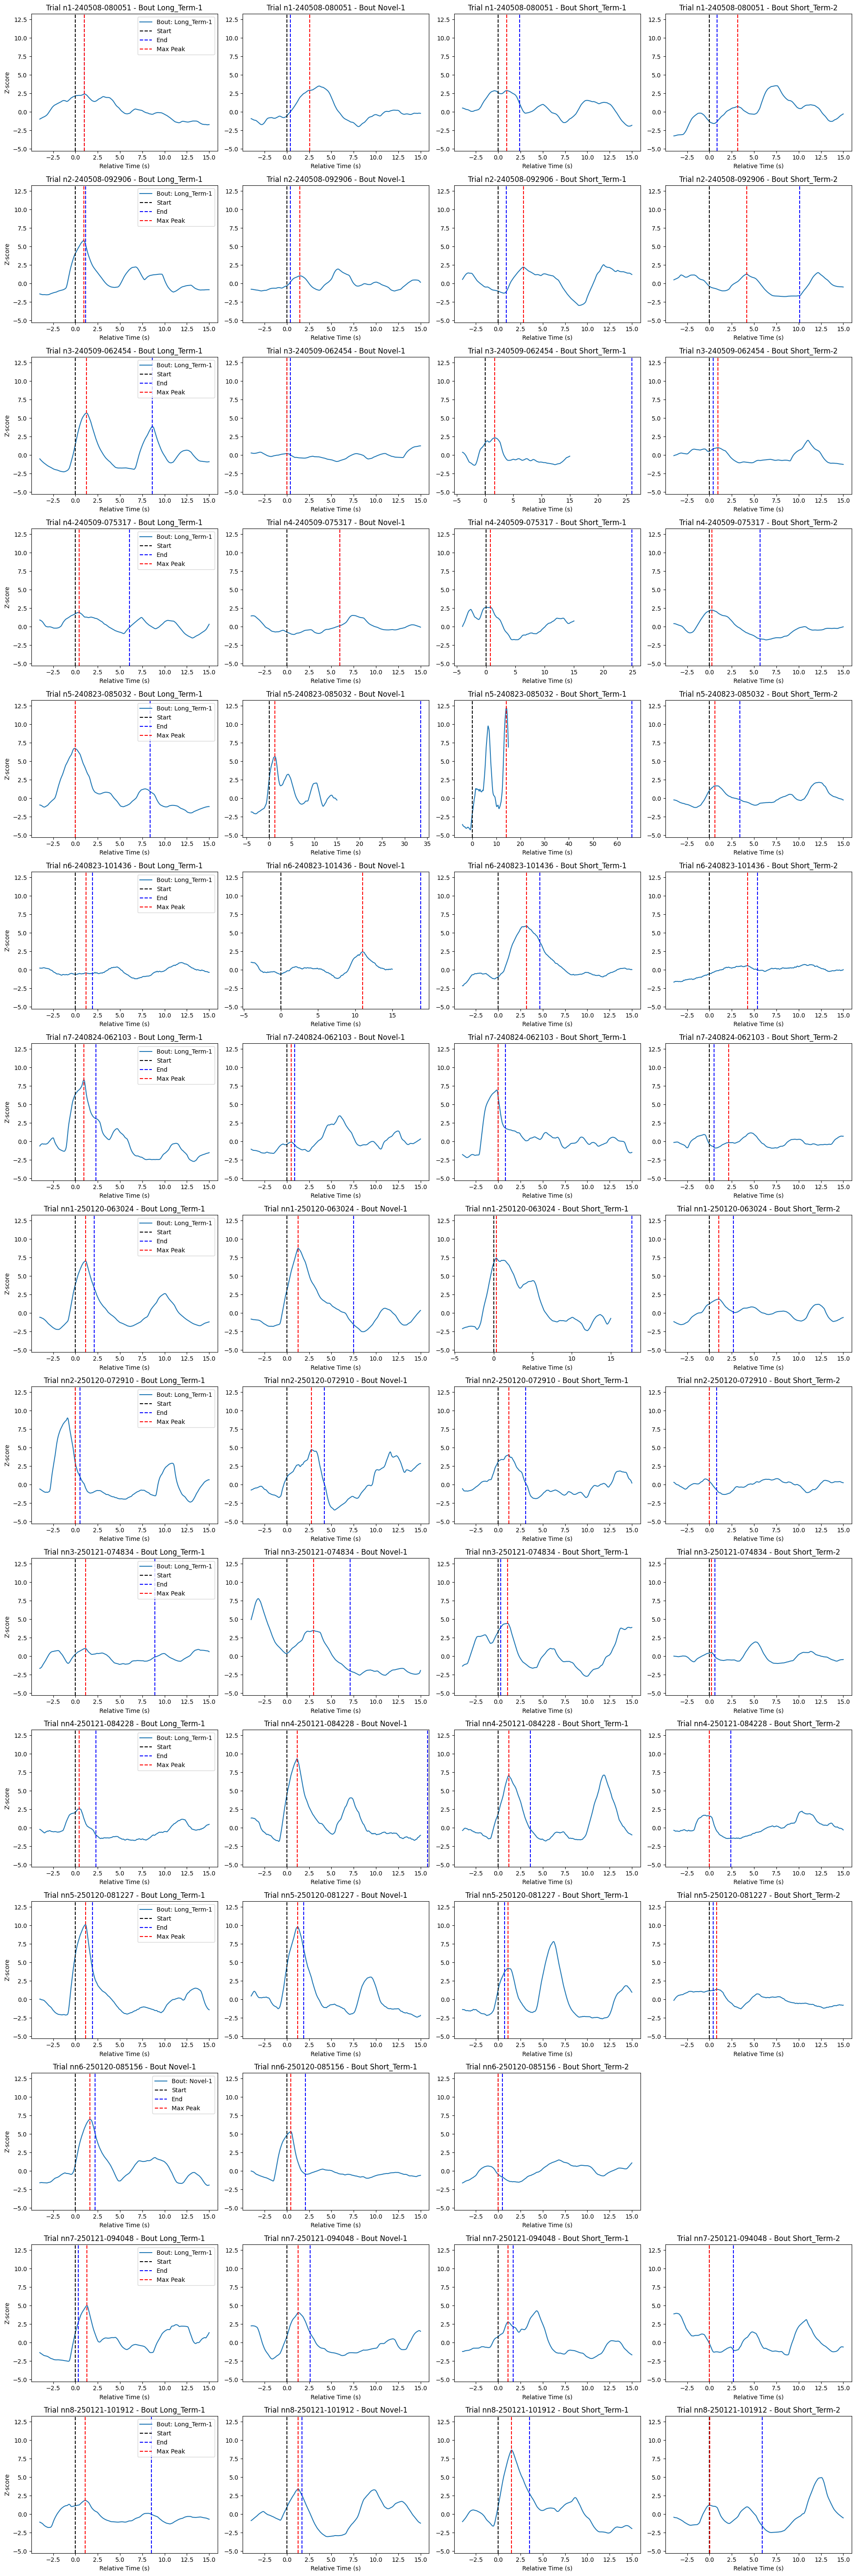

In [9]:
desired_bouts = ['Short_Term-1', 'Novel-1', 'Short_Term-2', 'Long_Term-1']
experiment.plot_first_behavior_PETHs(selected_bouts=desired_bouts)

PETH For individual trace commented out below

In [10]:
# df = experiment.trials['nn2-250120-072910'].behaviors
# print(df['Event_Zscore'])
# df.plot_first_behavior_PETHs()
# df
# # # 1. Filter to only 'Investigation' rows
# df_invest = df[df["Behavior"] == "Investigation"].copy()

# # # 2. Identify the first investigation of each bout.
# # #    - If your "Bout" column is already something like 's1-1', 's1-2', etc., you can group by it directly.
# # #    - Then select the first row in each group (based on order in df).
# df_first_invest = df_invest.groupby("Bout", as_index=False).first()

# # # Number of plots equals the number of first investigations
# n_plots = len(df_first_invest)

# # # Create side-by-side subplots
# fig, axes = plt.subplots(1, n_plots, figsize=(5*n_plots, 4), sharey=True)

# # # If only one bout, make axes iterable
# if n_plots == 1:
#      axes = [axes]

# # for i, (_, row) in enumerate(df_first_invest.iterrows()):
#      ax = axes[i]
    
# #     # Extract arrays for plotting
#      x = row["Relative_Time_Axis"]  
#      y = row["Relative_Zscore"]  
    
# #     # Plot main investigation trace
#      ax.plot(x, y, label=f"Bout: {row['Bout']}")

# #     # Dashed black line at investigation start (x=0)
#      ax.axvline(x=0, color='black', linestyle='--', label="Investigation Start")

# #     # Dashed blue line at investigation end (x = duration)
#      end_time = row["Duration (s)"]
#      ax.axvline(x=end_time, color='blue', linestyle='--', label="Investigation End")

# #     # Dashed red line at time of max peak
#      max_peak_time = row["Time of Max Peak"]
#      ax.axvline(x=max_peak_time, color='red', linestyle='--', label="Time of Max Peak")

# #     # Keep Y-limits consistent
#      ax.set_ylim([-2.5, 14])

# #     # Titles and labels
#      ax.set_title(f"Bout {row['Bout']}")
#      ax.set_xlabel("Relative Time (s)")

# # # Common Y-axis label
#      axes[0].set_ylabel("Z-score")

# # # Optional legend handling (show only in the first subplot)
#      axes[0].legend()

# # plt.tight_layout()
#      plt.show()


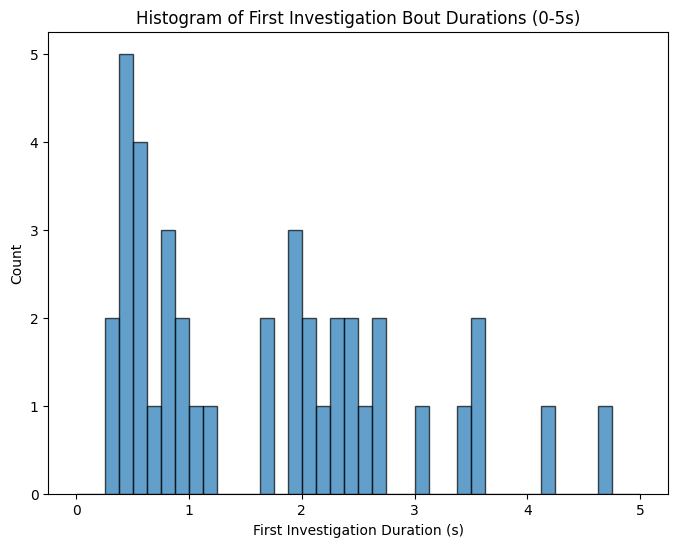

In [11]:
# Collect first investigation durations from all trials
first_investigation_durations = []

for trial_name, trial in experiment.trials.items():
    if hasattr(trial, 'behaviors') and not trial.behaviors.empty:
        # Filter only the first investigation per bout
        first_investigations = (
            trial.behaviors[trial.behaviors["Behavior"] == "Investigation"]
            .sort_values("Event_Start")
            .groupby("Bout", as_index=False)
            .first()
        )

        # Compute duration
        durations = first_investigations["Event_End"] - first_investigations["Event_Start"]
        first_investigation_durations.extend(durations.tolist())

# Convert to NumPy array for safety and filter between 0-5s
first_investigation_durations = np.array(first_investigation_durations)
filtered_durations = first_investigation_durations[
    (first_investigation_durations >= 0) & (first_investigation_durations <= 5)
]

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(filtered_durations, bins=40, range=(0, 5), edgecolor='black', alpha=0.7)
plt.xlabel("First Investigation Duration (s)")
plt.ylabel("Count")
plt.title("Histogram of First Investigation Bout Durations (0-5s)")
plt.show()
